# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [4]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [7]:
!pip install -r requirements.txt

  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested numpy==1.22.4
    pandas 1.5.3 depends on numpy>=1.21.0; python_version >= "3.10"
    pandas 1.5.3 depends on numpy>=1.23.2; python_version >= "3.11"

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



ERROR: Cannot install numpy==1.22.4 and pandas==1.5.3 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.




### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [9]:
file1 = 'data2.pkl'


In [10]:
# 파일을 불러올 경로와 파일 이름 설정
file_path = 'data1.pkl'

# 데이터프레임 불러오기
file1= joblib.load(file_path)

# 불러온 데이터프레임 확인
file1


,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time(mean),ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1월,1,...,-2.0,-8.9,0.0,63.0,28.0,9.07,겨울,1,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1월,1,...,2.4,-9.2,0.0,73.0,37.0,8.66,겨울,0,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1월,1,...,8.2,0.2,0.0,89.0,58.0,5.32,겨울,0,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1월,1,...,7.9,-0.9,0.0,95.0,52.0,6.48,겨울,0,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1월,2,...,4.1,-7.4,3.4,98.0,29.0,10.47,겨울,0,NaN,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-26,603,5555,4605,39.2,2163,7889,0,12월,52,...,3.0,-7.3,0.0,86.0,51.0,10.25,겨울,0,43.485714,0.828983
2918,2022-12-27,669,5635,4654,44.4,2198,8178,1,12월,52,...,-0.3,-5.4,0.1,92.0,40.0,10.86,겨울,0,42.771429,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,2,12월,52,...,1.7,-7.8,0.0,71.0,34.0,10.88,겨울,0,43.514286,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,3,12월,52,...,2.1,-4.0,0.0,87.0,38.0,10.84,겨울,0,42.957143,0.808952


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [11]:
file1.isna().sum()

Date                  0
car_cnt               0
request_cnt           0
ride_cnt              0
waiting_time          0
fare                  0
distance              0
weekday               0
month                 0
week                  0
year                  0
temp_max              0
temp_min              0
rain(mm)              0
humidity_max(%)       0
humidity_min(%)       0
sunshine(MJ/m2)       0
season                0
holiday               0
waiting_time(mean)    6
ride_rate             0
dtype: int64

In [12]:
file1.dropna(axis=0, inplace=True)

# 확인
file1.isna().sum()

Date                  0
car_cnt               0
request_cnt           0
ride_cnt              0
waiting_time          0
fare                  0
distance              0
weekday               0
month                 0
week                  0
year                  0
temp_max              0
temp_min              0
rain(mm)              0
humidity_max(%)       0
humidity_min(%)       0
sunshine(MJ/m2)       0
season                0
holiday               0
waiting_time(mean)    0
ride_rate             0
dtype: int64

In [13]:
file1.reset_index(drop=True, inplace=True)

In [14]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2916 non-null   datetime64[ns]
 1   car_cnt             2916 non-null   int64         
 2   request_cnt         2916 non-null   int64         
 3   ride_cnt            2916 non-null   int64         
 4   waiting_time        2916 non-null   float64       
 5   fare                2916 non-null   int64         
 6   distance            2916 non-null   int64         
 7   weekday             2916 non-null   int64         
 8   month               2916 non-null   category      
 9   week                2916 non-null   int64         
 10  year                2916 non-null   int64         
 11  temp_max            2916 non-null   float64       
 12  temp_min            2916 non-null   float64       
 13  rain(mm)            2916 non-null   float64     

### (2) 가변수화

In [15]:
# 가변수 대상 변수 식별
dumm_cols = ['season', 'month', 'holiday','weekday']

# 가변수화
file1 = pd.get_dummies(file1, columns=dumm_cols, drop_first=True)

# 확인
file1.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16480\2779874099.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  file1 = pd.get_dummies(file1, columns=dumm_cols, drop_first=True)


,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,week,year,temp_max,...,month_10월,month_11월,month_12월,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2015-01-07,410,4085,3676,24.7,2230,8646,2,2015,-0.2,...,0,0,0,0,0,1,0,0,0,0
1,2015-01-08,419,4030,3728,21.2,2231,8683,2,2015,3.2,...,0,0,0,0,0,0,1,0,0,0
2,2015-01-09,424,4167,3813,21.8,2215,8506,2,2015,4.3,...,0,0,0,0,0,0,0,1,0,0
3,2015-01-10,215,1916,1645,41.2,2447,11123,2,2015,2.3,...,0,0,0,0,0,0,0,0,1,0
4,2015-01-11,187,1700,1572,28.8,2419,10806,2,2015,3.4,...,0,0,0,0,0,0,0,0,0,1


In [16]:
file1['pred_wait']=file1['waiting_time'].shift(-1)

In [17]:
file1.dropna(axis=0, inplace=True)

In [18]:
file1.reset_index(drop=True, inplace=True)
file1

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,week,year,temp_max,...,month_11월,month_12월,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,pred_wait
0,2015-01-07,410,4085,3676,24.7,2230,8646,2,2015,-0.2,...,0,0,0,0,1,0,0,0,0,21.2
1,2015-01-08,419,4030,3728,21.2,2231,8683,2,2015,3.2,...,0,0,0,0,0,1,0,0,0,21.8
2,2015-01-09,424,4167,3813,21.8,2215,8506,2,2015,4.3,...,0,0,0,0,0,0,1,0,0,41.2
3,2015-01-10,215,1916,1645,41.2,2447,11123,2,2015,2.3,...,0,0,0,0,0,0,0,1,0,28.8
4,2015-01-11,187,1700,1572,28.8,2419,10806,2,2015,3.4,...,0,0,0,0,0,0,0,0,1,23.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2022-12-25,217,1945,1588,38.7,2416,10212,51,2022,1.5,...,0,1,1,0,0,0,0,0,1,39.2
2911,2022-12-26,603,5555,4605,39.2,2163,7889,52,2022,3.0,...,0,1,0,0,0,0,0,0,0,44.4
2912,2022-12-27,669,5635,4654,44.4,2198,8178,52,2022,-0.3,...,0,1,0,1,0,0,0,0,0,44.8
2913,2022-12-28,607,5654,4648,44.8,2161,7882,52,2022,1.7,...,0,1,0,0,1,0,0,0,0,52.5


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [19]:
drop_cols = ['year']
file1.drop(drop_cols, axis=1, inplace=True)

In [20]:
file1 = file1.set_index(keys='Date')

#### 1) x, y 나누기

In [21]:
target='pred_wait'

# 데이터 분리
x=file1.drop(target,axis=1)
y=file1.loc[:,target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [22]:
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=91,shuffle=False)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [23]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [24]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, r2_score


### (1) 머신러닝

In [25]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2915 entries, 2015-01-07 to 2022-12-29
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_cnt             2915 non-null   int64  
 1   request_cnt         2915 non-null   int64  
 2   ride_cnt            2915 non-null   int64  
 3   waiting_time        2915 non-null   float64
 4   fare                2915 non-null   int64  
 5   distance            2915 non-null   int64  
 6   week                2915 non-null   int64  
 7   temp_max            2915 non-null   float64
 8   temp_min            2915 non-null   float64
 9   rain(mm)            2915 non-null   float64
 10  humidity_max(%)     2915 non-null   float64
 11  humidity_min(%)     2915 non-null   float64
 12  sunshine(MJ/m2)     2915 non-null   float64
 13  waiting_time(mean)  2915 non-null   float64
 14  ride_rate           2915 non-null   float64
 15  season_겨울           2915 non-null   u

#### 1) 모델1

In [26]:
from sklearn.metrics import mean_absolute_percentage_error


In [27]:
model = LinearRegression()
model.fit(x_train_s,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test_s)

In [29]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))
print('MAPE:' , mean_absolute_percentage_error(y_test,y_pred))

MAE: 4.26781161466279
R2-Score: 0.040416774774623354
MAPE: 0.10671615807571794


#### 2) 모델2

In [30]:
model = DecisionTreeRegressor(max_depth=5)
# 성능예측
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [31]:
y_pred = model.predict(x_test)
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))
print('MAPE:' , mean_absolute_percentage_error(y_test,y_pred))

MAE: 5.100327403185084
R2-Score: -0.14015776748676867
MAPE: 0.12337580345770038


#### 3) 모델3

In [32]:
model = LGBMRegressor(max_depth=5, verbose=-100)
model.fit(x_train,y_train)

LGBMRegressor(max_depth=5, verbose=-100)

In [33]:
y_pred = model.predict(x_test)
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))
print('MAPE:' , mean_absolute_percentage_error(y_test,y_pred))

MAE: 4.669816222539904
R2-Score: -0.08049442857698086
MAPE: 0.11414683540166679


#### 4) 모델4

In [34]:
# 선언하기
model = RandomForestRegressor(max_depth=5)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [35]:
y_pred = model.predict(x_test)
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))
print('MAPE:' , mean_absolute_percentage_error(y_test,y_pred))

MAE: 4.596703953269185
R2-Score: 0.031959272314441955
MAPE: 0.11218637937981174


### (2) 딥러닝

In [36]:
import tensorflow as tf
import pandas as pd

In [37]:
file_path = 'data1.pkl'

# 데이터프레임 불러오기
file1= joblib.load(file_path)

# 불러온 데이터프레임 확인
file1



,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time(mean),ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1월,1,...,-2.0,-8.9,0.0,63.0,28.0,9.07,겨울,1,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1월,1,...,2.4,-9.2,0.0,73.0,37.0,8.66,겨울,0,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1월,1,...,8.2,0.2,0.0,89.0,58.0,5.32,겨울,0,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1월,1,...,7.9,-0.9,0.0,95.0,52.0,6.48,겨울,0,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1월,2,...,4.1,-7.4,3.4,98.0,29.0,10.47,겨울,0,NaN,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-26,603,5555,4605,39.2,2163,7889,0,12월,52,...,3.0,-7.3,0.0,86.0,51.0,10.25,겨울,0,43.485714,0.828983
2918,2022-12-27,669,5635,4654,44.4,2198,8178,1,12월,52,...,-0.3,-5.4,0.1,92.0,40.0,10.86,겨울,0,42.771429,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,2,12월,52,...,1.7,-7.8,0.0,71.0,34.0,10.88,겨울,0,43.514286,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,3,12월,52,...,2.1,-4.0,0.0,87.0,38.0,10.84,겨울,0,42.957143,0.808952


In [38]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (2824, 36)
x_test shape: (91, 36)


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras.models import Model

# 데이터를 numpy 배열로 변환
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 데이터를 reshape
X_train = x_train.reshape(-1, 1, 36)
X_test = x_test.reshape(-1, 1, 36)

# 모델 입력 레이어 정의
input_layer = Input(shape=(1, 36))

# LSTM 레이어 추가
lstm_layer = LSTM(32)(input_layer)

# 출력 레이어 추가
output_layer = Dense(1)(lstm_layer)

# 모델 정의
model1 = Model(inputs=input_layer, outputs=output_layer)
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# 모델 훈련 (X_train, y_train 사용)
model1.fit(X_train, y_train, epochs=30, batch_size=32)

# 모델 평가 (X_train, y_train 사용)
loss_acc = model1.evaluate(X_train, y_train)
loss_test = model1.evaluate(X_test, y_test)

# 모델 예측 (X_test 사용)
pred1 = model1.predict(X_test)

# 평가 및 예측 결과 출력
print("Training Loss and MAE:", loss_acc)
print("Testing Loss and MAE:", loss_test)
print('MAE : ', mean_absolute_error(pred1, y_test))
print('MAPE : ', mean_absolute_percentage_error(pred1, y_test))
print('R2 : ', r2_score(pred1, y_test))


Epoch 1/30
89/89 [==============================] - 1s 2ms/step - loss: 1763.2893 - mae: 39.5030
Epoch 2/30
89/89 [==============================] - 0s 1ms/step - loss: 1689.1713 - mae: 38.5672
Epoch 3/30
89/89 [==============================] - 0s 1ms/step - loss: 1628.1805 - mae: 37.7726
Epoch 4/30
89/89 [==============================] - 0s 1ms/step - loss: 1568.3091 - mae: 36.9713
Epoch 5/30
89/89 [==============================] - 0s 1ms/step - loss: 1514.5834 - mae: 36.2384
Epoch 6/30
89/89 [==============================] - 0s 1ms/step - loss: 1460.6932 - mae: 35.4873
Epoch 7/30
89/89 [==============================] - 0s 1ms/step - loss: 1398.3499 - mae: 34.5972
Epoch 8/30
89/89 [==============================] - 0s 1ms/step - loss: 1344.6907 - mae: 33.8061
Epoch 9/30
89/89 [==============================] - 0s 2ms/step - loss: 1293.3993 - mae: 33.0389
Epoch 10/30
89/89 [==============================] - 0s 2ms/step - loss: 1243.8765 - mae: 32.2749
Epoch 11/30
89/89 [==========

#### 1) 모델1

In [ ]:
!pip install tensorflow


#### 2) 모델2

In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras.models import Model

# 데이터를 numpy 배열로 변환
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 데이터를 reshape
X_train = x_train.reshape(-1, 1, 36)
X_test = x_test.reshape(-1, 1, 36)

# 모델 입력 레이어 정의
input_layer = Input(shape=(1, 36))

# LSTM 레이어 추가
lstm_layer = LSTM(32)(input_layer)
lstm_layer = LSTM(32)(input_layer)

# 출력 레이어 추가
output_layer = Dense(1)(lstm_layer)

# 모델 정의
model1 = Model(inputs=input_layer, outputs=output_layer)
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# 모델 훈련 (X_train, y_train 사용)
model1.fit(X_train, y_train, epochs=40, batch_size=32)

# 모델 평가 (X_train, y_train 사용)
loss_acc = model1.evaluate(X_train, y_train)
loss_test = model1.evaluate(X_test, y_test)

# 모델 예측 (X_test 사용)
pred1 = model1.predict(X_test)

# 평가 및 예측 결과 출력
print("Training Loss and MAE:", loss_acc)
print("Testing Loss and MAE:", loss_test)
print('MAE : ', mean_absolute_error(pred1, y_test))
print('MAPE : ', mean_absolute_percentage_error(pred1, y_test))
print('R2 : ', r2_score(pred1, y_test))


Epoch 1/40
89/89 [==============================] - 1s 2ms/step - loss: 1772.6636 - mae: 39.6228
Epoch 2/40
89/89 [==============================] - 0s 2ms/step - loss: 1730.0607 - mae: 39.0810
Epoch 3/40
89/89 [==============================] - 0s 1ms/step - loss: 1698.2028 - mae: 38.6730
Epoch 4/40
89/89 [==============================] - 0s 2ms/step - loss: 1659.9634 - mae: 38.1696
Epoch 5/40
89/89 [==============================] - 0s 2ms/step - loss: 1625.2343 - mae: 37.7074
Epoch 6/40
89/89 [==============================] - 0s 1ms/step - loss: 1593.2241 - mae: 37.2813
Epoch 7/40
89/89 [==============================] - 0s 1ms/step - loss: 1561.2897 - mae: 36.8510
Epoch 8/40
89/89 [==============================] - 0s 1ms/step - loss: 1530.1937 - mae: 36.4242
Epoch 9/40
89/89 [==============================] - 0s 2ms/step - loss: 1499.2098 - mae: 35.9981
Epoch 10/40
89/89 [==============================] - 0s 2ms/step - loss: 1468.7925 - mae: 35.5716
Epoch 11/40
89/89 [==========

Epoch 1/40
89/89 [==============================] - 0s 2ms/step - loss: 704.4230 - mae: 22.3861 - val_loss: 694.3297 - val_mae: 25.6459
Epoch 2/40
89/89 [==============================] - 0s 2ms/step - loss: 685.6822 - mae: 21.9638 - val_loss: 672.9279 - val_mae: 25.2252
Epoch 3/40
89/89 [==============================] - 0s 2ms/step - loss: 667.3312 - mae: 21.5437 - val_loss: 651.7809 - val_mae: 24.8025
Epoch 4/40
89/89 [==============================] - 0s 2ms/step - loss: 649.1526 - mae: 21.1291 - val_loss: 630.9543 - val_mae: 24.3790
Epoch 5/40
89/89 [==============================] - 0s 2ms/step - loss: 631.4923 - mae: 20.7213 - val_loss: 610.3059 - val_mae: 23.9518
Epoch 6/40
89/89 [==============================] - 0s 2ms/step - loss: 614.1938 - mae: 20.3186 - val_loss: 590.3676 - val_mae: 23.5319
Epoch 7/40
89/89 [==============================] - 0s 2ms/step - loss: 597.2684 - mae: 19.9240 - val_loss: 570.6351 - val_mae: 23.1088
Epoch 8/40
89/89 [==============================

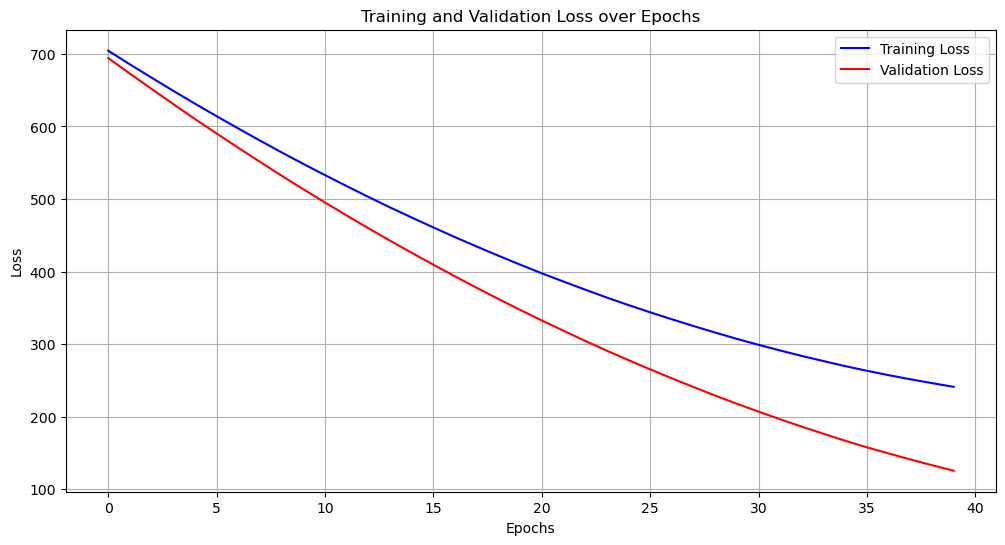

In [42]:
history = model1.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# 훈련 및 검증 손실 이력 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 에폭에 따른 손실 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label="Training Loss", color="blue")
plt.plot(val_loss, label="Validation Loss", color="red")
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()




## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.